Epoch 1/10
41/41 [==============================] - 212s 5s/step - loss: 1.6885 - accuracy: 0.5383 - val_loss: 1.1268 - val_accuracy: 0.7156
Epoch 2/10
41/41 [==============================] - 223s 5s/step - loss: 0.7457 - accuracy: 0.7236 - val_loss: 0.6688 - val_accuracy: 0.7676
Epoch 3/10
41/41 [==============================] - 216s 5s/step - loss: 0.3733 - accuracy: 0.8591 - val_loss: 0.3982 - val_accuracy: 0.8838
Epoch 4/10
41/41 [==============================] - 225s 5s/step - loss: 0.2193 - accuracy: 0.9296 - val_loss: 0.5012 - val_accuracy: 0.8349
Epoch 5/10
41/41 [==============================] - 220s 5s/step - loss: 0.0979 - accuracy: 0.9671 - val_loss: 0.7599 - val_accuracy: 0.7706
Epoch 6/10
41/41 [==============================] - 222s 5s/step - loss: 0.1228 - accuracy: 0.9594 - val_loss: 0.5059 - val_accuracy: 0.8502
Epoch 7/10
41/41 [==============================] - 223s 5s/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.6483 - val_accuracy: 0.8410
Epoch 8/10
41

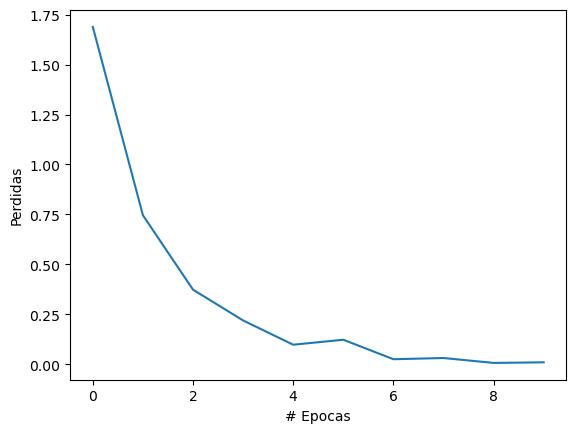

26/26 [==============================] - 26s 991ms/step
MATRIZ DE CONFUSION
[[ 23   0  18   1   0   6   0]
 [  0  83   0   2   0  12   0]
 [  4   1  40   0   0   0   0]
 [  1  22   0 422   0   5   9]
 [  1   0   0   3  15   0   0]
 [  0  22   0   5   0  87   0]
 [  0   1   0   6   0   0  20]]


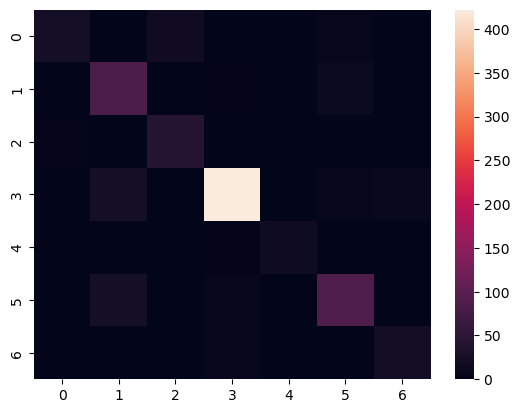

26/26 [==============================] - 26s 990ms/step
MATRIZ CONFUSION DEL ERROR DE TEST
[[ 23   0  18   1   0   6   0]
 [  0  83   0   2   0  12   0]
 [  4   1  40   0   0   0   0]
 [  1  22   0 422   0   5   9]
 [  1   0   0   3  15   0   0]
 [  0  22   0   5   0  87   0]
 [  0   1   0   6   0   0  20]]
41/41 [==============================] - 40s 971ms/step
MATRIZ CONFUSION DEL ERROR DE ENTRENAMIENTO
[[ 46   0   0   0   0   0   0]
 [  0 176   0   0   0   0   0]
 [  0   0  84   0   0   0   0]
 [  0   1   0 747   0   0   0]
 [  0   0   0   0  33   0   0]
 [  0   0   0   0   0 163   0]
 [  0   0   0   0   0   0  56]]


In [5]:
# Importar las librerias 
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Definir directorios de los datos
# Entrenamiento
train_directory = 'CarneDataset/train'
# Test
test_directory = 'CarneDataset/test'
# Parametros de ejecucion se tomara 20% para validacion y el 80% para entrenamiento
test_size=0.2
random_state=32
# Definiciòn de epocas a considerar 
epochs=10
# Definiciòn de numero de imagenes que se le pasa a la red
batch_size=32
x_train_images = []
y_train_labels = []
x_test_images = []
y_test_labels = []


# Contar el  numero de archivos de un directorio
def fcount(path):
    count = 0
    for f in os.listdir(path):
        if os.path.isfile(os.path.join(path, f)):
            count += 1
    return count

# Guardar las imagenes de entrenamiento y los nombres de los archivos en listas de entrenamiento y de etiquetas
#  Si el directorio esta vacio no se guarda la lista

# Leer las imágenes de test y almacenar en las listas de imagenes y etiquetas
for label_class in os.listdir(train_directory):
    label_directory = os.path.join(train_directory, label_class)
    if (fcount(label_directory)) > 0:
        for filename in os.listdir(label_directory):
            img_path_train = os.path.join(label_directory, filename)
            img_train = cv2.imread(img_path_train)
            x_train_images.append(img_train)
            y_train_labels.append(label_class)
           
        
            
# Gurdar las imágenes de test y almacenar en las listas de imagenes y etiquetas
for label_class in os.listdir(test_directory):
    label_directory = os.path.join(test_directory, label_class)
    if (label_class in y_train_labels):    
        for filename in os.listdir(label_directory):
            img_path_test = os.path.join(label_directory, filename)
            img_test = cv2.imread(img_path_test)
            x_test_images.append(img_test)
            y_test_labels.append(label_class)
  
      
# Convertir las listas de imágenes y etiquetas a matrices NumPy
x_train_images = np.array(x_train_images)
y_train_labels = np.array(y_train_labels)

# Convertir las listas de imágenes y etiquetas de prueba a matrices NumPy
x_test_images = np.array(x_test_images)
y_test_labels = np.array(y_test_labels)

# Normalizar los valores de píxeles de las imágenes de prueba entre 0 y 1
x_test_images = x_test_images.astype('float32') / 255.0


# Codificar las etiquetas como números one hot encoding
label_encoder = LabelEncoder()
y_train_labels_encoded = label_encoder.fit_transform(y_train_labels)


# Codificar las etiquetas como números one hot encoding
y_test_labels_encoded = label_encoder.transform(y_test_labels)


# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train_images, x_val_images, y_train_labels_encoded, y_val_labels_encoded = train_test_split(x_train_images, y_train_labels_encoded, test_size=test_size, random_state=random_state)

# Normalizar los valores de píxeles entre 0 y 1
x_train_images = x_train_images.astype('float32') / 255.0
x_val_images = x_val_images.astype('float32') / 255.0


# Definir la arquitectura de la red CNN
model = Sequential()
# capa convulcional identifica 32 filtros 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train_images.shape[1:]))
# Capa convulcional identifica 32 filtros
model.add(Conv2D(32, (3, 3), activation='relu'))
# Capa maxpooling permite reducir las dimensiones de la imagen 
model.add(MaxPooling2D((2, 2)))
# % de datos aleatorios a no considerar de las neurones para evitar 
model.add(Dropout(0.25))
# capa convulcional  
model.add(Conv2D(64, (3, 3), activation='relu'))
# capa convulcional  
model.add(Conv2D(64, (3, 3), activation='relu'))
# Capa maxpooling permite reducir las dimensiones de la imagen 
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

# Clasificador 
model.add(Flatten())
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


# compilamoa el modelo definiendo que utilizamos el optimizador adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo datos entrenamiento y datos validación 
historial= model.fit(x_train_images, y_train_labels_encoded, epochs=epochs, batch_size=batch_size, validation_data=(x_val_images, y_val_labels_encoded))

# Verificar las perdidas del modelo
plt.xlabel("# Epocas")
plt.ylabel("Perdidas")
plt.plot(historial.history["loss"])

plt.show()


# Probar el modelo con los datos de prueba
predictions = model.predict(x_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión del modelo
matrizconfusion = confusion_matrix(y_test_labels_encoded, predicted_labels)
print('MATRIZ DE CONFUSION')
print(matrizconfusion)

#dataframe = pd.DataFrame(matrizconfusion, range(7), range(7))
#plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4)
#sns.heatmap(dataframe, annot=True, annot_kvs={'size': 12})
#plt.show()
sns.heatmap(matrizconfusion)
plt.show()

# Calcular la matriz de confusión del error en prueba
test_predictions = model.predict(x_test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
matriz_test_confusion = confusion_matrix(y_test_labels_encoded, test_predicted_labels)

print('MATRIZ CONFUSION DEL ERROR DE TEST')
print(matriz_test_confusion)

# Calcular la matriz de confusión del error en entrenamiento
train_predictions = model.predict(x_train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
matriz_train_confusion = confusion_matrix(y_train_labels_encoded, train_predicted_labels)

print('MATRIZ CONFUSION DEL ERROR DE ENTRENAMIENTO')
print(matriz_train_confusion)

